# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#And solve the query

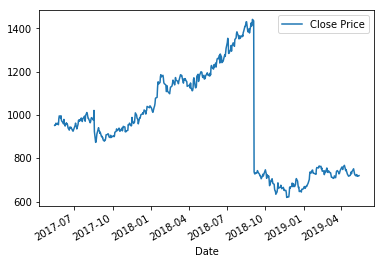

In [2]:
df = pd.read_csv("week2.csv")
df["Date"] = pd.to_datetime(df['Date'])

df.plot(x="Date", y = "Close Price")

Query 2.2 A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

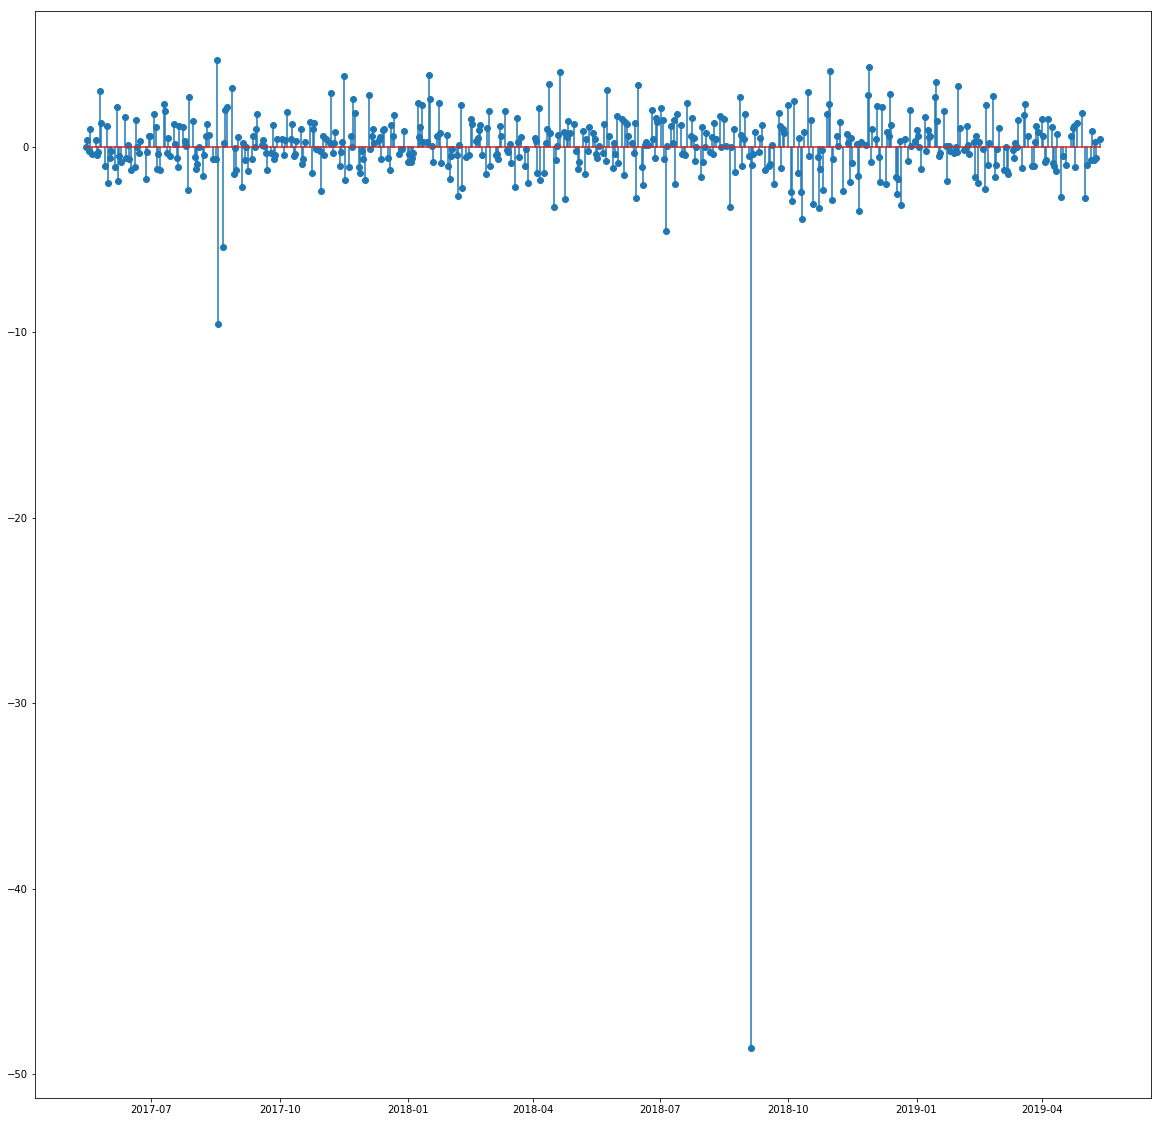

In [3]:
fig = plt.figure(figsize = (20,20))
plt.stem(df["Date"],df["Day_Perc_Change"])

Query 2.3 Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 
 

<StemContainer object of 3 artists>

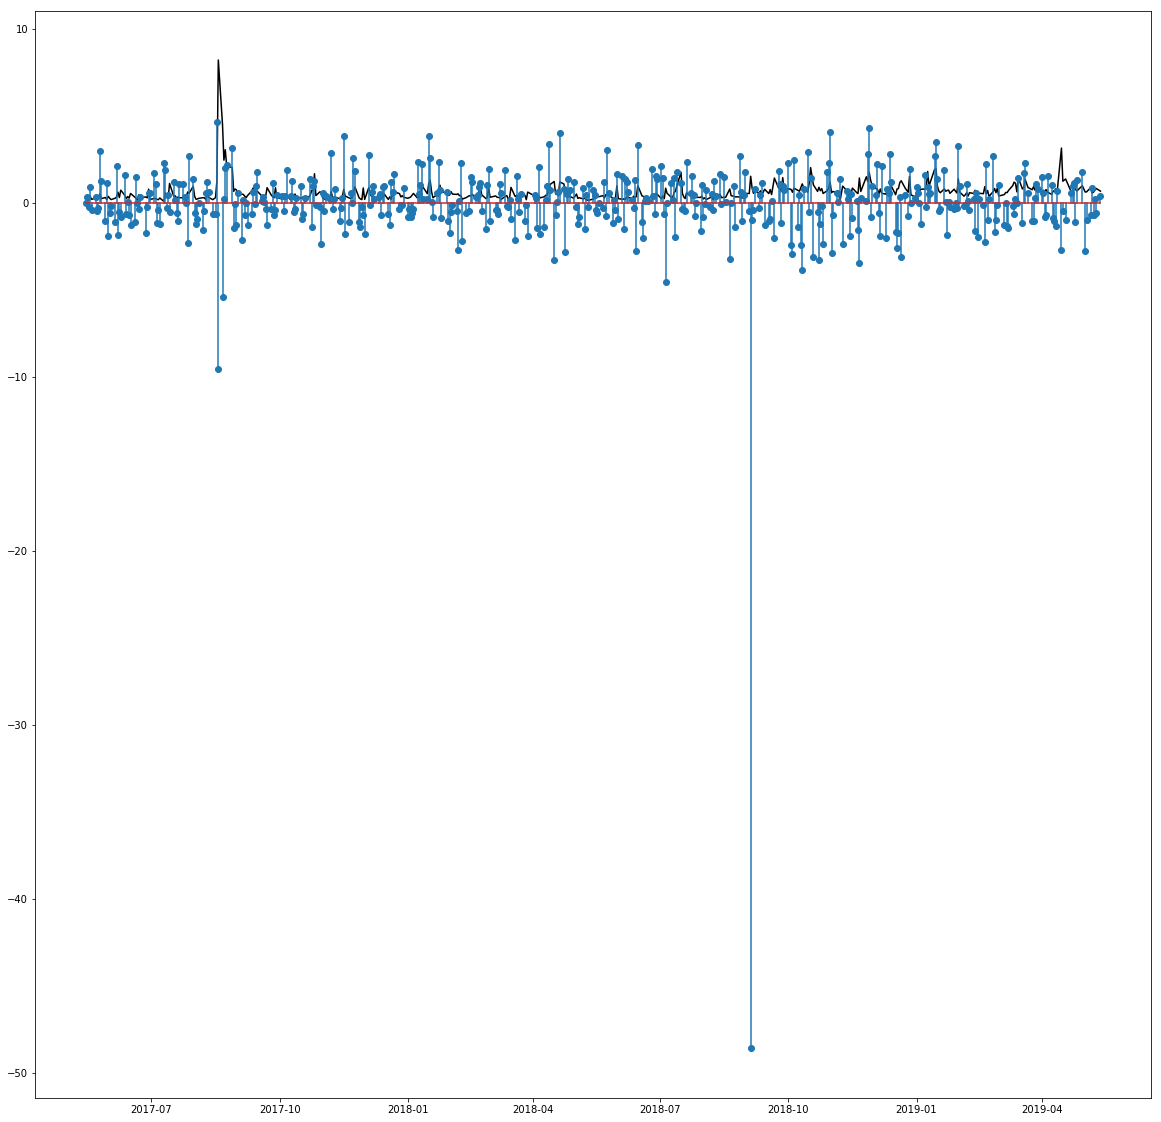

In [5]:
fig = plt.figure(figsize = (20,20))
plt.plot(df["Date"],df["Total Traded Quantity"]/pow(10,7),color='black')
plt.stem(df["Date"],df["Day_Perc_Change"])


Query 2.4 We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 


([<matplotlib.patches.Wedge at 0x22c25902278>,
 [Text(1.0942498039158928, 0.11232705208466258, 'Among top gainers'),
  Text(1.0607133337090793, 0.2913541207736241, 'Among top losers'),
  Text(1.0368685223516312, 0.36729234589948245, 'Bear drop'),
  Text(0.6697257895046076, 0.8726209754941892, 'Negative'),
  Text(-0.6433211566868469, 0.8922655935085122, 'Positive'),
  Text(-1.0972475769170793, -0.07776731286085543, 'Slight Negative'),
  Text(-0.7820514766332872, -0.7735602677850609, 'Slight Positive'),
  Text(0.6141285958832556, -0.9126040037817394, 'Slight or No change')],
 [Text(0.5968635294086687, 0.06126930113708867, '3.3%'),
  Text(0.5785709092958613, 0.15892042951288587, '2.0%'),
  Text(0.5655646485554352, 0.20034127958153589, '0.3%'),
  Text(0.36530497609342233, 0.47597507754228496, '18.0%'),
  Text(-0.3509024491019164, 0.4866903237319157, '22.7%'),
  Text(-0.5984986783184069, -0.04241853428773932, '9.7%'),
  Text(-0.42657353270906573, -0.4219419642463968, '12.9%'),
  Text(0.3349

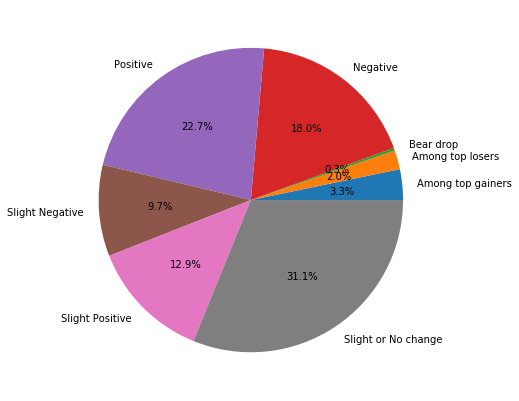

In [6]:
fig = plt.figure(figsize = (7,7))
df["Days"] = df["Date"].dt.day
p = df.Days.groupby(df.Trend).sum()
plt.pie(p,labels = p.index,autopct='%1.1f%%')

<BarContainer object of 8 artists>

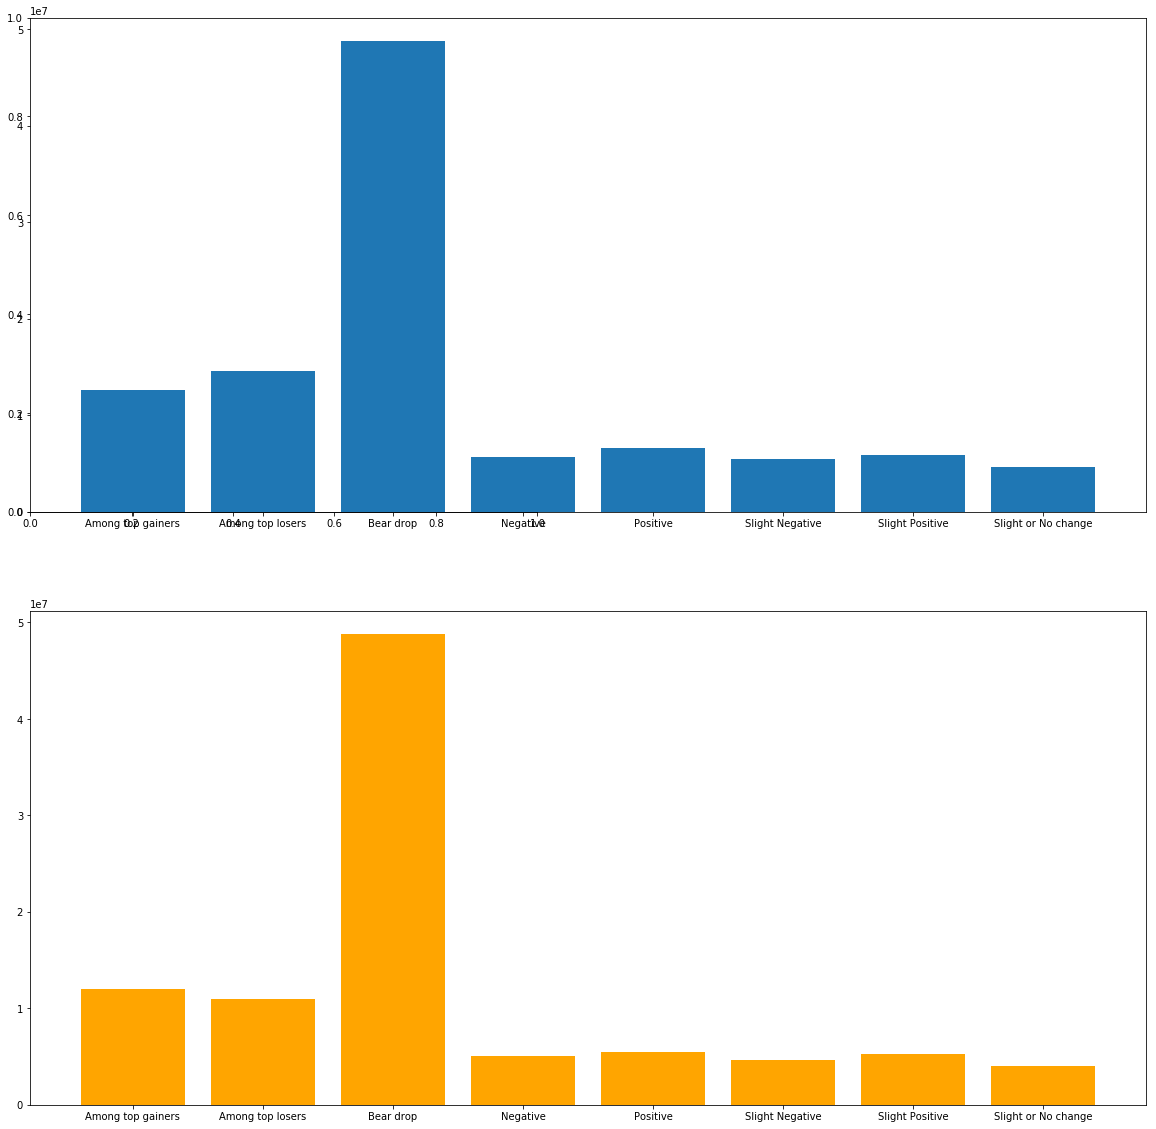

In [7]:
fig = plt.figure(figsize = (20,20))
fig.add_subplot(221)
grp = df.groupby("Trend")
meandata = grp["Total Traded Quantity"].mean()
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(meandata.index,meandata)
mediandata = grp["Total Traded Quantity"].median()
ax2 = fig.add_subplot(212, sharex = ax1)
ax2.bar(mediandata.index,mediandata,color = 'orange')

Query 2.5 Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

<BarContainer object of 494 artists>

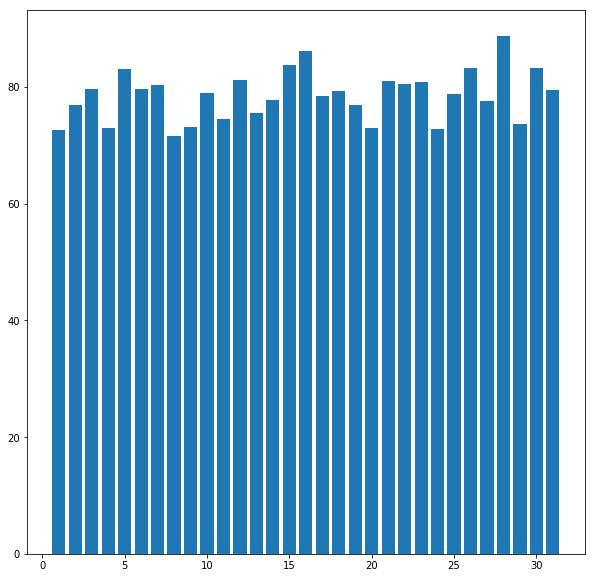

In [8]:
fig = plt.figure(figsize = (10,10))
plt.bar( df["Days"] , df["% Dly Qt to Traded Qty"])

In [9]:
stock1 = pd.read_csv("IDBI.csv")
stock2 = pd.read_csv("PNB.csv")
stock3 = pd.read_csv("ADANIPOWER.csv")
stock4 = pd.read_csv("NBCC.csv")
stock5 = pd.read_csv("VOLTAS.csv")
stock1 = stock1[(stock1 == "EQ").any(axis=1)]
stock2 = stock2[(stock2 == "EQ").any(axis=1)]
stock3 = stock3[(stock3 == "EQ").any(axis=1)]
stock4 = stock4[(stock4 == "EQ").any(axis=1)]
stock5 = stock5[(stock5 == "EQ").any(axis=1)]

In [10]:
closeprice = pd.DataFrame({'IDBI': stock1["Close Price"],
                           'PNB': stock2["Close Price"],
                           'ADANIPOWER': stock3["Close Price"],
                           'NBCC': stock4["Close Price"],
                           'VOLTAS': stock5["Close Price"]})
closeprice.head()

,IDBI,PNB,ADANIPOWER,NBCC,VOLTAS
0,75.05,166.80,30.25,197.60,431.85
1,76.65,174.15,32.85,198.25,432.45
2,75.95,165.05,33.10,200.35,430.20
3,69.95,158.50,31.90,194.20,414.10
4,68.75,155.20,32.40,193.55,415.75


In [11]:
data1 = closeprice.pct_change(axis='columns')
per_change = pd.DataFrame(data1)
per_change = per_change.dropna(axis = "columns")
per_change.head()

,PNB,ADANIPOWER,NBCC,VOLTAS
0,1.222518,-0.818645,5.532231,1.185476
1,1.272016,-0.811370,5.035008,1.181337
2,1.173140,-0.799455,5.052870,1.147242
3,1.265904,-0.798738,5.087774,1.132338
4,1.257455,-0.791237,4.973765,1.148024


In [12]:
import seaborn as sns
sns.__version__

'0.9.0'

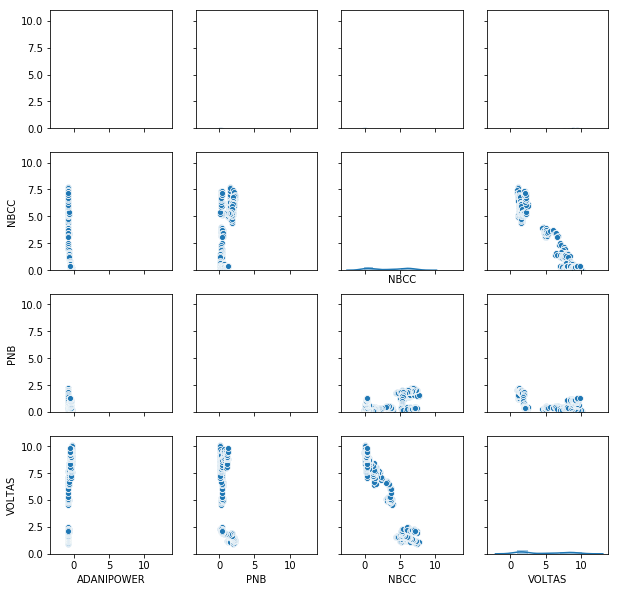

In [112]:
f, axes = plt.subplots(4, 4, figsize=(10, 10), sharex=True, sharey=True)
#sns.distplot(per_change["ADANIPOWER"], kde=False,ax=axes[0, 0])
sns.scatterplot(x = per_change["ADANIPOWER"] , y = per_change["NBCC"] , ax = axes[1,0] )
sns.scatterplot(x = per_change["ADANIPOWER"] , y = per_change["PNB"] , ax = axes[2,0] )
sns.scatterplot(x = per_change["ADANIPOWER"] , y = per_change["VOLTAS"] , ax = axes[3,0] )
sns.scatterplot(x = per_change["PNB"] , y = per_change["ADANIPOWER"] , ax = axes[0,1] )
sns.scatterplot(x = per_change["PNB"] , y = per_change["NBCC"] , ax = axes[1,1] )
#sns.distplot( per_change["PNB"] ,ax = axes[2,1] )
sns.scatterplot(x = per_change["PNB"] , y = per_change["VOLTAS"] , ax = axes[3,1] )
sns.scatterplot(x = per_change["NBCC"] , y = per_change["ADANIPOWER"],ax= axes[0,2])
sns.distplot( per_change["NBCC"] ,ax = axes[1,2] )
sns.scatterplot(x = per_change["NBCC"] , y = per_change["PNB"],ax= axes[2,2])
sns.scatterplot(x = per_change["NBCC"] , y = per_change["VOLTAS"],ax= axes[3,2])
sns.scatterplot(x = per_change["VOLTAS"] , y = per_change["ADANIPOWER"],ax= axes[0,3])
sns.scatterplot(x = per_change["VOLTAS"] , y = per_change["NBCC"],ax= axes[1,3])
sns.scatterplot(x = per_change["VOLTAS"] , y = per_change["PNB"],ax= axes[2,3])
sns.distplot( per_change["VOLTAS"] ,ax= axes[3,3])

2.7 Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

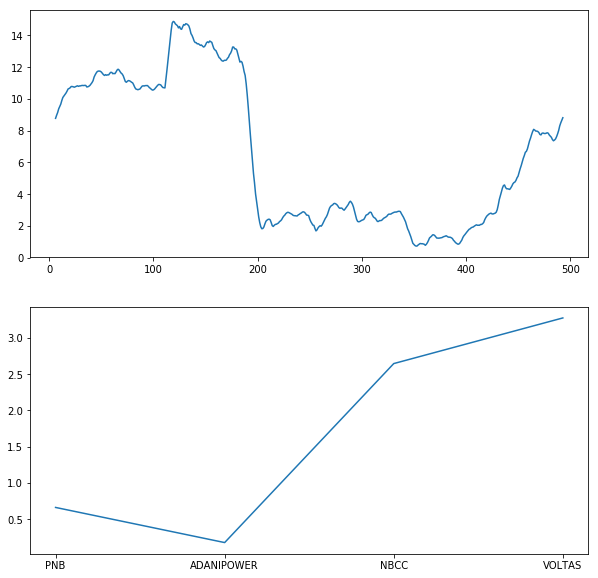

In [168]:
fig = plt.figure(figsize = (10,10))
rolling_avg = per_change["PNB"].rolling(7,win_type = None).sum()
deviation = per_change.std(axis=0)
ax = fig.add_subplot(211)
ax.plot(rolling_avg)
ax1 = fig.add_subplot(212)
ax1.plot(deviation)

2.8 Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 


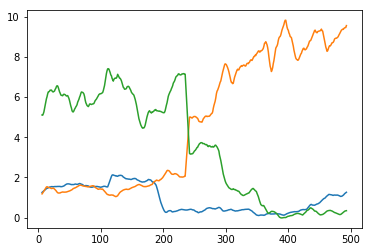

In [276]:
rolling_avg = per_change["PNB"].rolling(7,win_type = None).mean()
rolling_avg1 = per_change["VOLTAS"].rolling(7,win_type = None).mean()
rolling_avg2 = per_change["VOLTAS"].rolling(7,win_type = None).mean()
plt.plot(rolling_avg)
plt.plot(rolling_avg1)
rolling_avg2 = per_change["NBCC"].rolling(7,win_type = None).mean()
plt.plot(rolling_avg2)

Query 2.9 Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
 
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

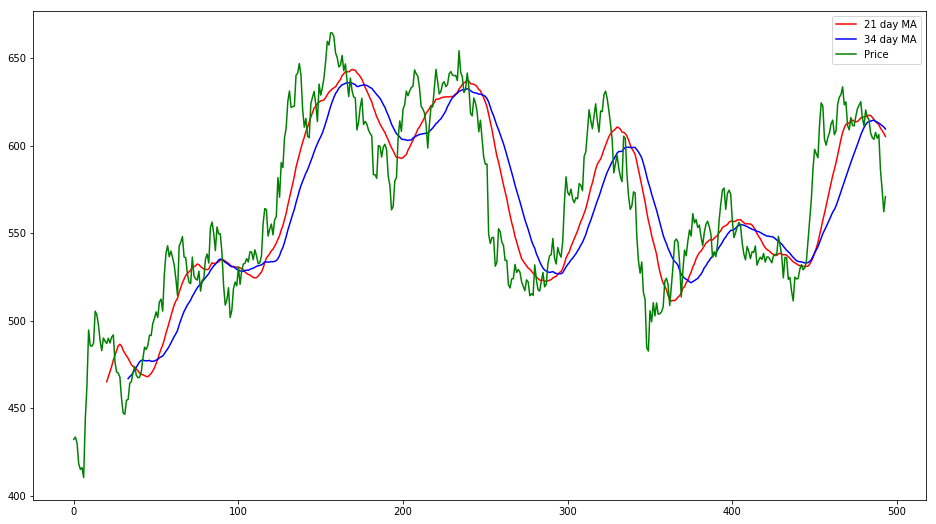

In [265]:
fig = plt.figure(figsize = (16,9))
rolling_avg = stock5["Close Price"].rolling(21,win_type = None).mean()
plt.plot(rolling_avg ,color="red", label ="21 day MA")
rolling_avg1 = stock5["Close Price"].rolling(34,win_type = None).mean()
plt.plot(rolling_avg1,color = "b",label = '34 day MA' )
plt.plot(stock5["Average Price"],color= 'g',label = "Price")
plt.legend()

2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

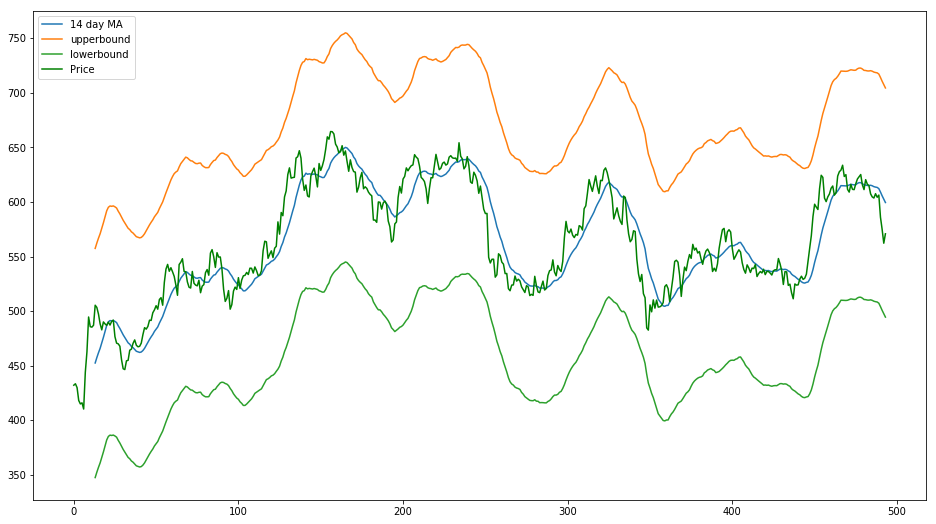

In [277]:
fig = plt.figure(figsize = (16,9))
rolling_mean = stock5["Close Price"].rolling(14,win_type = None).mean()
plt.plot(rolling_mean , label ="14 day MA")
deviation = stock5["Close Price"].std(axis=0)
upper_bound = rolling_mean+2*deviation
plt.plot(upper_bound , label ="upperbound")
lower_bound = rolling_mean-2*deviation
plt.plot(lower_bound , label ="lowerbound")
plt.plot(stock5["Average Price"],color= 'g',label = "Price")
plt.legend()